In [172]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from scipy import stats as st

# Задание 1

Ответьте на следующие вопросы:

1. Как критики относятся к спортивным играм?
2. Критикам нравятся больше игры на PC или на PS4?
3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [144]:
df = pd.read_csv('video_games_sales.csv')

## Как критики относятся к спортивным играм?

H0: Критики высоко оценивают спортивные игры: средняя оценка спортивных игр >= 7.5  
H1: Критики не высоко оценивают спортивные игры: средняя оценка спортивных игр < 7.5

Примем alpha = 0.05

In [145]:
alpha = 0.05
result = st.ttest_1samp(df[(df.Genre == 'Sports') & (~df.Critic_Score.isnull())]['Critic_Score'], 7.5)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, критики не высоко оценивают спортивные игры')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критики высоко оценивают спортивные игры')

Ttest_1sampResult(statistic=-3.719660933773832, pvalue=0.00021577789041608633)
Отвергаем нулевую гипотезу, критики не высоко оценивают спортивные игры


Полученное значение alpha меньше порогового уровня 0.05. Следовательно, нулевую гипотезу можно отвергнуть, приняв альтернативную гипотезу. Таким образом, считая высокими оценки выше 7.5, можно утверждать, что критики не высоко оценивают спортивные игры.

## Критикам нравятся больше игры на PC или на PS4?

H0: Критикам больше нравятся игры на PC, чем на PS4  
H1: Критикам больше нравятся игры на PS4, чем на PC

Примем alpha = 0.05

В данном случае независимость выборок стоит под сомнением, ибо вполне вероятно, что оценки играм на PC и PS4 выставляют одни и те же организации и даже одни и те же люди.  
Ввиду отсутствия более детализированной информации, а также ввиду несоответствия размера выборок, примем допущение, что выборки всё-таки независимы.

In [146]:
alpha = 0.05

result = st.ttest_ind(df[(df.Platform == 'PC') & (~df.Critic_Score.isnull())]['Critic_Score'], df[(df.Platform == 'PS4') & (~df.Critic_Score.isnull())]['Critic_Score'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся игры на PS4, чем на PC')
else:
    print('Не отвергаем нулевую гипотезу, критикам больше нравятся игры на PC, чем на PS4')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Отвергаем нулевую гипотезу, критикам больше нравятся игры на PS4, чем на PC


Полученное значение alpha меньше порогового уровня 0.05. Следовательно, нулевую гипотезу можно отвергнуть, приняв альтернативную гипотезу. Таким образом, игры на PS4 нравятся критикам больше, чем игры на PC.

## Критикам нравятся больше стрелялки или стратегии?

H0: Критикам больше нравятся стрелялки, нежели стратегии  
H1: Критикам больше нравятся стратегии, нежели стрелялки

Примем alpha = 0.05

В данном случае независимость выборок, как и в предыдущем случае, стоит под сомнением.  
Ввиду отсутствия более детализированной информации, а также ввиду несоответствия размера выборок, примем допущение, что выборки всё-таки независимы.

In [147]:
alpha = 0.05

result = st.ttest_ind(df[(df.Genre == 'Shooter') & (~df.Critic_Score.isnull())]['Critic_Score'], df[(df.Genre == 'Strategy') & (~df.Critic_Score.isnull())]['Critic_Score'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся стрелялки, нежели стратегии')
else:
    print('Не отвергаем нулевую гипотезу, критикам больше нравятся стратегии, нежели стрелялки')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу, критикам больше нравятся стратегии, нежели стрелялки


Полученное значение alpha больше порогового уровня 0.05. Следовательно, нулевую гипотезу нельзя отвергнуть. Таким образом, критикам больше нравятся стратегии, нежели стрелялки.

# Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений по признаку спама. Для этого:

1. Привидите весь текст к нижнему регистру;
1. Удалите мусорные символы;
1. Удалите стоп-слова;
1. Привидите все слова к нормальной форме;
1. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами `TfidfVectorizer`;

6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
1. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
1. Опишите результаты при помощи confusion_matrix;
1. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [241]:
df_spam_origin = pd.read_csv('spam.csv')
df_spam_origin.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [242]:
# приводим категории к меткам классов
categories = {'ham': 0, 'spam': 1}
df_spam_origin['Category'] = df_spam_origin.Category.map(categories)

In [243]:
df_spam = df_spam_origin.copy()

In [244]:
# приводим весь текст к нижнему регистру
df_spam.Message = df_spam.Message.apply(lambda x: x.lower())

In [245]:
# удаляем служебные символы
df_spam.Message = df_spam.Message.apply(lambda x: re.sub('[\W_]+',' ', x))

In [246]:
# создаем столбец с разделенными словами сообщения
df_spam['Splitted_message'] = df_spam.Message.apply(lambda x: x.split())

In [247]:
# удаляем стоп-слова
stopwords_set = set(stopwords.words('english'))
df_spam['Splitted_message'] = df_spam.Splitted_message.apply(lambda x: [word for word in x if word not in stopwords_set])

In [248]:
# приводим слова к начальным формам
wordnet_lemmatizer = WordNetLemmatizer()
df_spam['Splitted_message'] = df_spam.Splitted_message.apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

In [249]:
df_spam.Message = df_spam.Splitted_message.apply(lambda x: ' '.join(x))

In [250]:
# преобразуем все сообщения в вектора TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [251]:
# делим данные на тренировочное и тестовое подмножества
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_spam.Category, test_size=0.30, random_state=42)

In [252]:
# строим и обучаем модель логистической регрессии
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train) 

LogisticRegression(random_state=42)

In [253]:
# оцениваем точность модели на тестовых данных
lr.score(X_test, y_test)

0.958732057416268

In [254]:
y_test.value_counts()

0    1448
1     224
Name: Category, dtype: int64

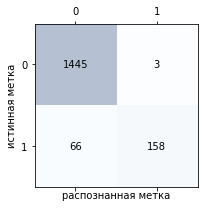

In [255]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

confmat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xlabel('распознанная метка')
plt.ylabel('истинная метка')
plt.show()

Почти все сообщения, не являющиеся спамом, модель классифирует правильно. При этом, сообщения, действительно являющиеся спамом правильно классифицируются только примерно в 70% случаев.

In [258]:
df_spam_test = df_spam_origin.loc[X_test.index.values]
df_spam_test.head()

,Category,Message
3245,0,Squeeeeeze!! This is christmas hug.. If u lik ...
944,0,And also I've sorta blown him off a couple tim...
1044,0,Mmm thats better now i got a roast down me! i...
2484,0,Mm have some kanji dont eat anything heavy ok
812,0,So there's a ring that comes with the guys cos...


In [260]:
# Список сообщений, классфифицированных неправильно
df_spam_test['Predict'] = y_pred
df_spam_test[df_spam_test.Category != df_spam_test.Predict]

,Category,Message,Predict
2952,0,Hey now am free you can call me.,1
881,1,Reminder: You have not downloaded the content ...,0
1961,1,Guess what! Somebody you know secretly fancies...,0
3864,1,Oh my god! I've found your number again! I'm s...,0
2575,1,Your next amazing xxx PICSFREE1 video will be ...,0
...,...,...,...
4543,1,FreeMsg Hi baby wow just got a new cam moby. W...,0
752,1,You have an important customer service announc...,0
309,1,TheMob> Check out our newest selection of cont...,0
495,0,Are you free now?can i call now?,1
